In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.04 s (started: 2023-01-14 23:14:39 +00:00)


In [15]:
!pip3 install ipython-autotime

%load_ext autotime


import pandas as pd
import numpy as np
# import pickle5 as pickle
import re
from nltk.stem import WordNetLemmatizer
import nltk
from tqdm.notebook import tqdm
tqdm.pandas()
import requests

from termcolor import colored
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

nb_workers=10

import os
from datetime import datetime
# import pickle
import ast
import re

import seaborn as sns
from matplotlib import pyplot as plt
sns.set()


my_dir = '/content/drive/MyDrive/Discord-Reddit/'

punctuations = """!"$%()*+,*/:»«";“<=>?[\]^`”|{.}~"""
def clean_text_local(row):
    row=re.sub('\x0c',' ',row)
    row=re.sub('\u200c',' ',row)
    # row=re.sub('\n\n',' . ',row)
    # row=re.sub('\\n',' ',row)

    row=re.sub('\\\\n',' ',row)
    row=re.sub('\n',' ',row)
    
    row=re.sub("-?NEWLINE_TOKEN", " ",row)
    row=re.sub("TAB_TOKEN", " ",row)
    row=re.sub("Alternate option=", "",row)
    row=re.sub('RT',' ',row)
    row = row.lower()
    
    row=re.sub("@[A-Za-z0-9_]+","",row)
    row=re.sub("http\S+|www.\S+","",row)

    row = re.sub(r'<.*?>', ' ', row)
    row = re.sub('\w*\d\w*','',row)
    row=re.sub("&amp","&",row)
#     row=re.sub("\d","",row)
#     row=re.sub(r"\b\d+\b|\b(?![i])[a-z]\b","",row) # removes every isolated number or char except i
    # row = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(row)])
    row=re.sub('-',' ',row)
    # no_punct = ""
    # for char in row:
    #     if char not in punctuations:
    #         no_punct = no_punct + char
    row = row.strip()
    row = re.sub('\s+',' ',row)
    return row

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 10 s (started: 2023-01-14 23:14:46 +00:00)


In [3]:
import os
discords = os.listdir('/content/drive/MyDrive/Discord-Reddit/Datasets/discord')
subreddits = os.listdir('/content/drive/MyDrive/Discord-Reddit/Datasets/reddit')

# discords.remove('.ipynb_checkpoints')
# subreddits.remove('.ipynb_checkpoints')

time: 1.33 s (started: 2023-01-14 20:38:58 +00:00)


In [16]:
def clean_df(data,text_col,author_col):
  data[text_col]=data[text_col].astype(str)
  # data[text_col]=data[text_col].progress_apply(lambda x: )
  data=data[data[text_col].apply(lambda x: len(x.split(' '))) >= 3]
  data=data[data[author_col]!='error']
  data=data[data[author_col]!=0]
  data=data[data [author_col]!='AutoModerator']
  data.drop_duplicates(subset=text_col, keep='first', inplace=True, ignore_index=False)
  return data

time: 2.57 ms (started: 2023-01-14 23:14:59 +00:00)


In [ ]:
'ds ss  sss'.split(' ')

['ds', 'ss', '', 'sss']

time: 2.91 ms (started: 2022-12-12 16:28:45 +00:00)


In [19]:
def plot_authors_content_count(community_name_x):

  binwidth_x = 0.00001



  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit=clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord=clean_df(data_discord,text_col='content',author_col='author_username')

  data_reddit_authors = data_reddit.groupby(by=['author'])['comment_text'].agg(['count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 10]
  data_reddit_authors['proportion'] = data_reddit_authors['count']/(data_reddit_authors['count'].sum())


  data_discord_authors = data_discord.groupby(by=['author_username'])['content'].agg(['count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 10]
  data_discord_authors['proportion'] = data_discord_authors['count']/(data_reddit_authors['count'].sum())
  
  fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
  fig.suptitle(f'{community_name_x}',fontsize=20)

  # Reddit
  sns.histplot(ax=axes[0], data=data_reddit_authors, x='proportion', kde=True, stat='density',binwidth=binwidth_x, color='red')
  axes[0].set_title('Subreddit')
  # if agg_x == 'mean':
  axes[0].set_xlim(0,0.0008)
  # if agg_x == 'sum':
  #   axes[0].set_xlim(0,200)

  # Discord
  sns.histplot(ax=axes[1], data=data_discord_authors, x='proportion', kde=True, stat='density',binwidth=binwidth_x, color='blue')
  axes[1].set_title('Discord Server')
  # if agg_x == 'mean':
  axes[1].set_xlim(0,0.0008)
  # if agg_x == 'sum':
  #   axes[1].set_xlim(0,200)
  plt.savefig(my_dir+f"Charts/User_Post_Count/{community_name_x}_User_Post_Count", bbox_inches = 'tight',format="jpeg", dpi=350)
  plt.show()

time: 5.09 ms (started: 2023-01-14 23:16:09 +00:00)


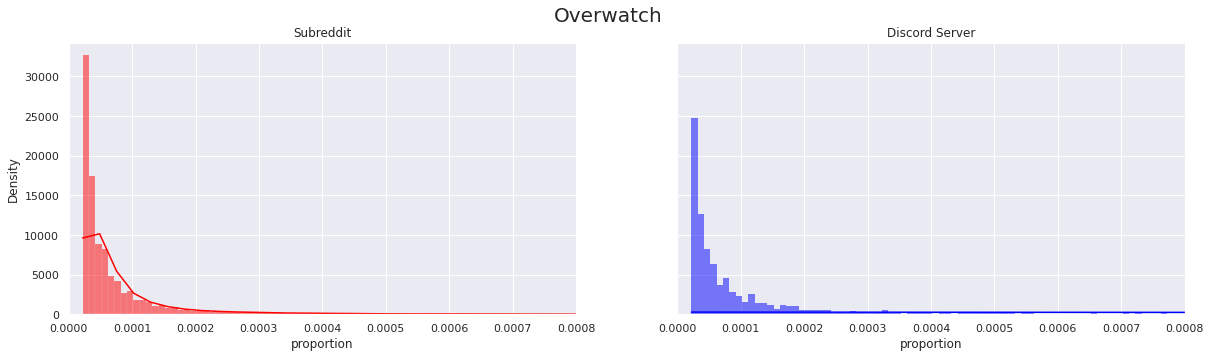

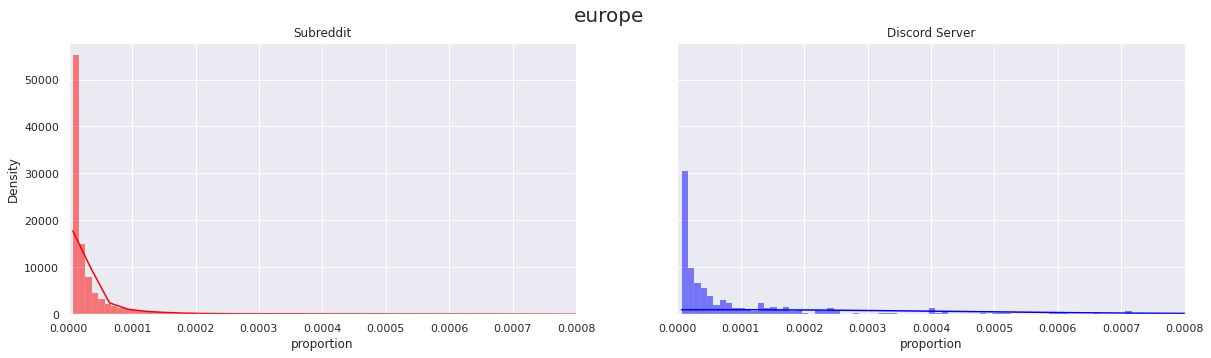

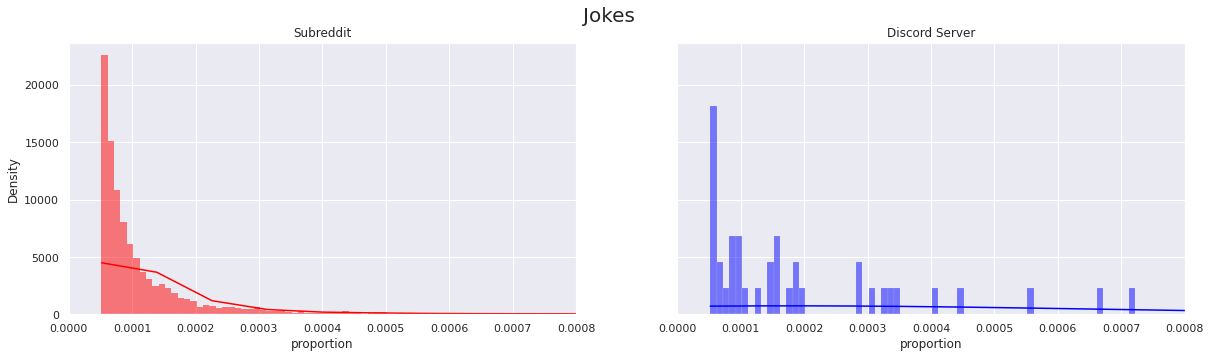

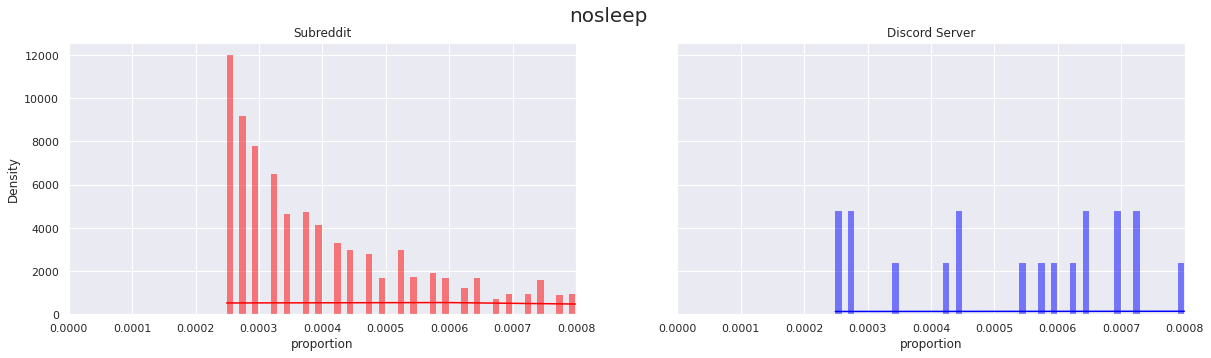

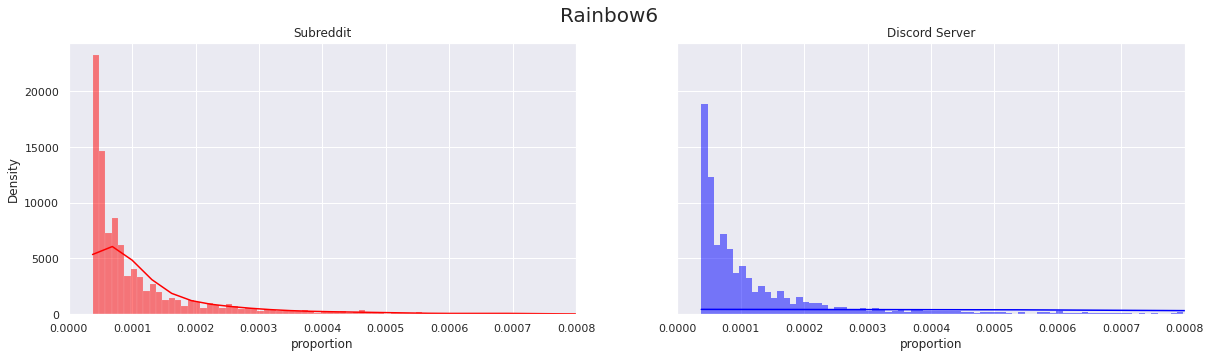

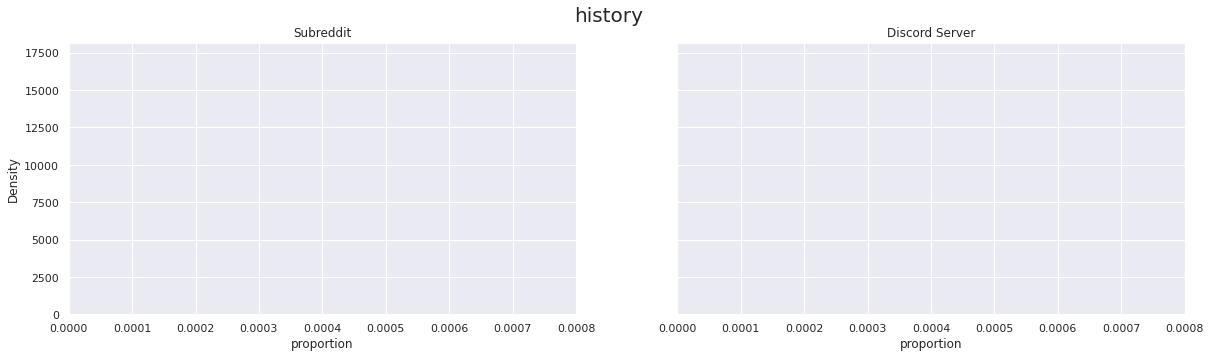

<ipython-input-20-251f9e99c3cb>:5: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  plot_authors_content_count(community_name_x=community_name)


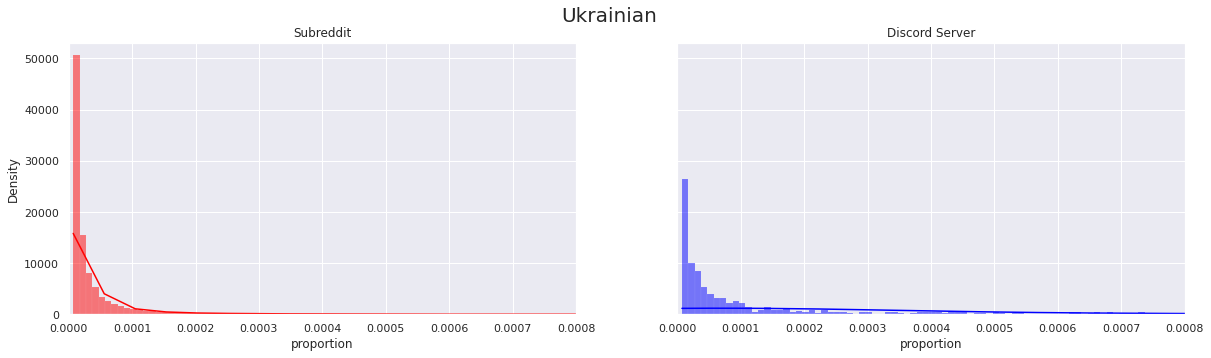

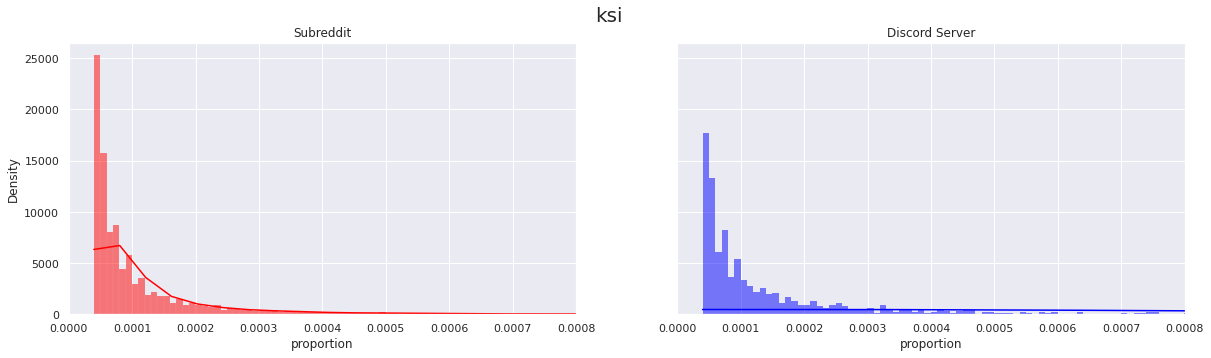

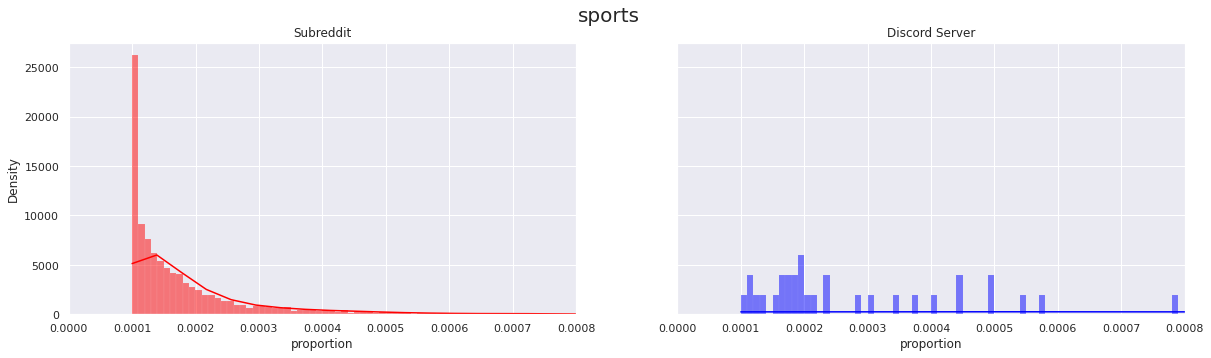

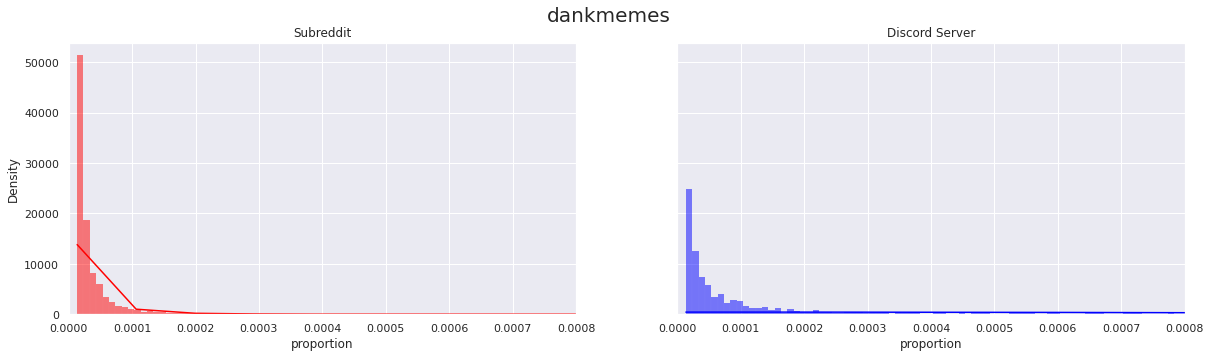

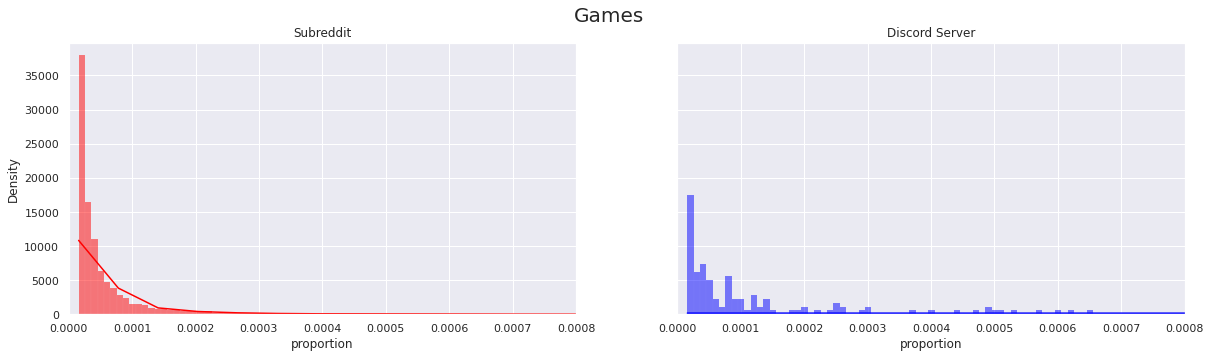

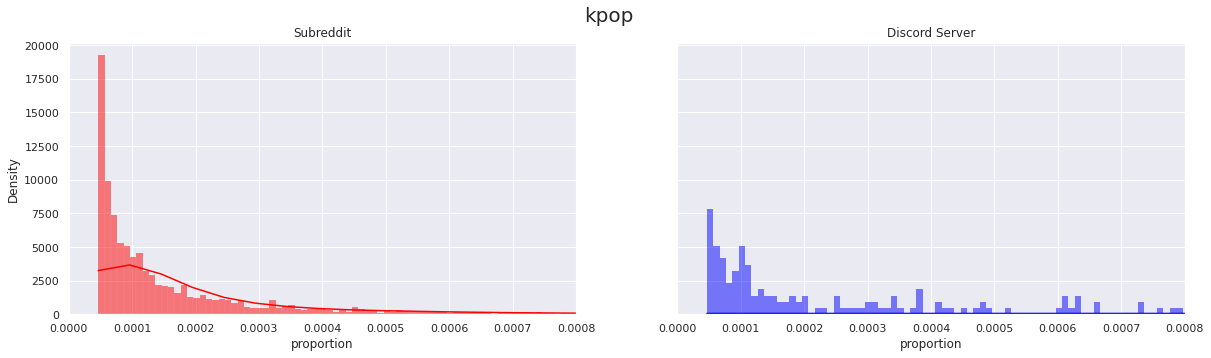

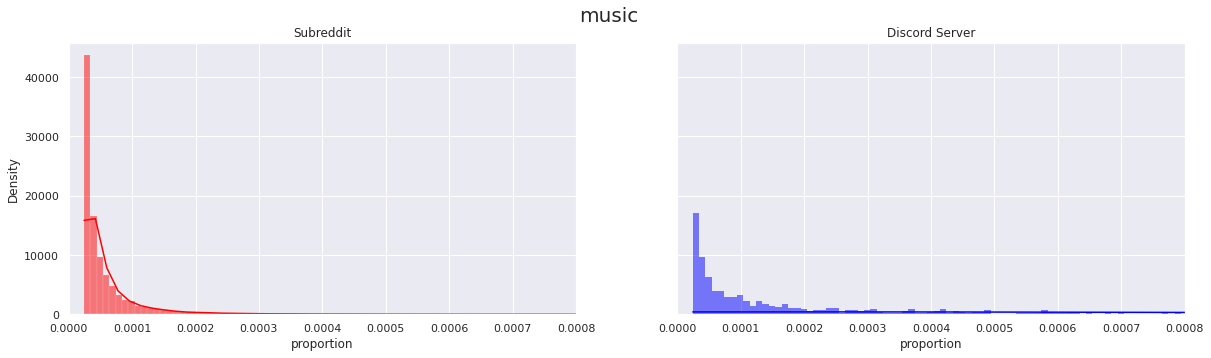

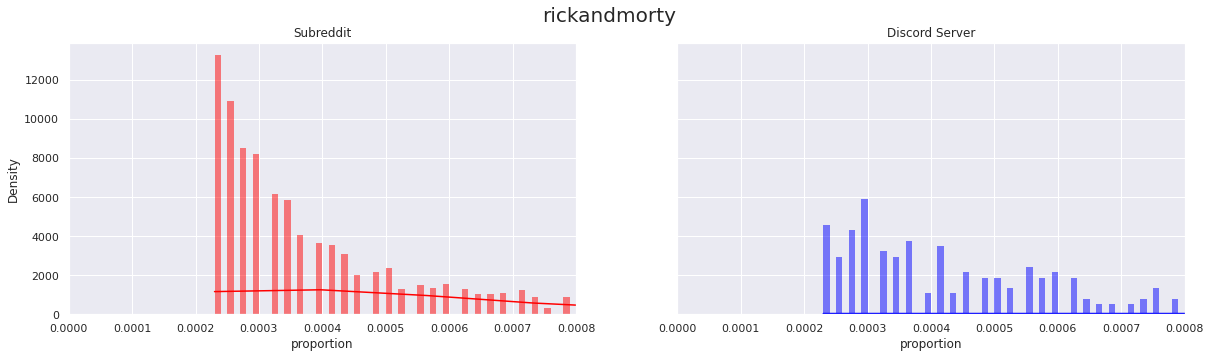

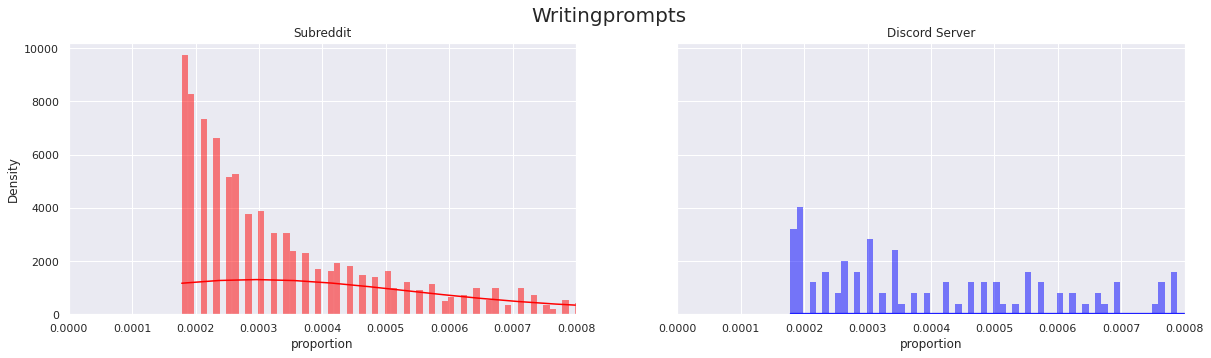

time: 12min 16s (started: 2023-01-14 23:16:11 +00:00)


In [20]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

for community_name in community_names:
  plot_authors_content_count(community_name_x=community_name)

# Skewness

In [ ]:
from scipy.stats import skew

def get_community_skewness(community_name_x, agg_x='mean'):

  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit=clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord=clean_df(data_discord,text_col='content',author_col='author_username')

  data_reddit_authors = data_reddit.groupby(by=['author'])['comment_text'].agg(['count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 5]


  data_discord_authors = data_discord.groupby(by=['author_username'])['content'].agg(['count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 5]

  return {'community_name': community_name_x, 'Reddit Skewness':skew(data_reddit_authors['count']), 'Discord Skewness':skew(data_discord_authors['count'])}

time: 2.62 ms (started: 2023-01-13 12:33:56 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

data_skewness = pd.DataFrame()

for community_name in community_names:
  skew_x = get_community_skewness(community_name_x=community_name)
  print(skew_x)
  data_skewness = data_skewness.append(skew_x,ignore_index=True)




{'community_name': 'Overwatch', 'Reddit Skewness': 14.549295780100055, 'Discord Skewness': 12.928188235513206}
{'community_name': 'europe', 'Reddit Skewness': 20.990907092595965, 'Discord Skewness': 6.578474758108304}
{'community_name': 'Jokes', 'Reddit Skewness': 45.10514269277156, 'Discord Skewness': 4.190938834683152}
{'community_name': 'nosleep', 'Reddit Skewness': 30.674345476940427, 'Discord Skewness': 2.420620264240844}
{'community_name': 'Rainbow6', 'Reddit Skewness': 12.08247957550575, 'Discord Skewness': 15.86763207734846}
{'community_name': 'history', 'Reddit Skewness': 9.22506910573843, 'Discord Skewness': 5.4967704753465245}


<ipython-input-22-684d585f0a8a>:7: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  skew_x = get_community_skewness(community_name_x=community_name)


{'community_name': 'Ukrainian', 'Reddit Skewness': 39.06341472303073, 'Discord Skewness': 6.385375101521014}
{'community_name': 'ksi', 'Reddit Skewness': 20.17290217652717, 'Discord Skewness': 14.839139377522697}
{'community_name': 'sports', 'Reddit Skewness': 17.705138305066352, 'Discord Skewness': 2.8087553190468815}
{'community_name': 'dankmemes', 'Reddit Skewness': 121.84456704761821, 'Discord Skewness': 9.270833345530344}
{'community_name': 'Games', 'Reddit Skewness': 51.5952426113269, 'Discord Skewness': 3.7444038524536825}
{'community_name': 'kpop', 'Reddit Skewness': 11.037806353086136, 'Discord Skewness': 4.700028993816896}
{'community_name': 'music', 'Reddit Skewness': 16.043864848861464, 'Discord Skewness': 7.908836671448536}
{'community_name': 'rickandmorty', 'Reddit Skewness': 29.30323611465682, 'Discord Skewness': 10.431593580003012}
{'community_name': 'Writingprompts', 'Reddit Skewness': 7.7084229482356905, 'Discord Skewness': 3.9485724860680085}
time: 4min 9s (started: 

In [ ]:
data_skewness

,community_name,Reddit Skewness,Discord Skewness
0,Overwatch,14.549296,12.928188
1,europe,20.990907,6.578475
2,Jokes,45.105143,4.190939
3,nosleep,30.674345,2.420620
4,Rainbow6,12.082480,15.867632
5,history,9.225069,5.496770
6,Ukrainian,39.063415,6.385375
7,ksi,20.172902,14.839139
8,sports,17.705138,2.808755
9,dankmemes,121.844567,9.270833


time: 21.2 ms (started: 2023-01-13 12:49:17 +00:00)


# Toxicity Rate

In [ ]:
def get_binary_toxicity(value_x, cutoff_x=0.5):
  if value_x >= 0.5:
    return 1
  if value_x < 0.5:
    return 0

def get_top_percentage_share(data_x, value_col, top_percent=0.05):
  grand_total = data_x[value_col].sum()
  data_x['freq_pct'] = data_x[value_col].rank(pct=True)
  top_percent_total = data_x[data_x['freq_pct']>(1-top_percent)][value_col].sum()
  return top_percent_total/grand_total



def get_community_top_toxicity_share(community_name_x, agg_x='sum'):

  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit = clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord = clean_df(data_discord,text_col='content',author_col='author_username')


  # data_reddit['Binary_Toxic_BERT'] = data_reddit['Toxic_BERT'].map(get_binary_toxicity)
  data_reddit_authors = data_reddit.groupby(by=['author'])['comment_text'].agg(['count']).reset_index()
  data_reddit_authors = data_reddit_authors[data_reddit_authors['count'] >= 10]

  # data_discord['Binary_Toxic_BERT'] = data_discord['Toxic_BERT'].map(get_binary_toxicity)
  data_discord_authors = data_discord.groupby(by=['author_username'])['content'].agg(['count']).reset_index()
  data_discord_authors = data_discord_authors[data_discord_authors['count'] >= 10]

  return {'Community Name': community_name_x,
          'Reddit Total':data_reddit_authors['count'].sum(),
          'Discord Total':data_discord_authors['count'].sum(),
          'Reddit Top Share':get_top_percentage_share(data_x = data_reddit_authors, value_col = 'count', top_percent=0.05),
          'Discord Top Share':get_top_percentage_share(data_x = data_discord_authors, value_col = 'count', top_percent=0.05)}

time: 4.64 ms (started: 2023-01-13 13:00:33 +00:00)


In [ ]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

data_top_share = pd.DataFrame()

for community_name in community_names:
  print(f'beginning {community_name}')
  data_top_share = data_top_share.append(get_community_top_toxicity_share(community_name_x=community_name),ignore_index=True)


beginning Overwatch
beginning europe
beginning Jokes
beginning nosleep
beginning Rainbow6
beginning history
beginning Ukrainian


<ipython-input-28-d331ee75df21>:8: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  data_top_share = data_top_share.append(get_community_top_toxicity_share(community_name_x=community_name),ignore_index=True)


beginning ksi
beginning sports
beginning dankmemes
beginning Games
beginning kpop
beginning music
beginning rickandmorty
beginning Writingprompts
time: 4min 1s (started: 2023-01-13 13:01:15 +00:00)


In [ ]:
data_top_share

,Community Name,Reddit Toxicity,Discord Toxicity,Reddit Top Share,Discord Top Share
0,Overwatch,455289.0,1254501.0,0.322990,0.830506
1,europe,1542628.0,166512.0,0.435304,0.588030
2,Jokes,193495.0,4301.0,0.300364,0.468031
3,nosleep,40157.0,5326.0,0.371641,0.341344
4,Rainbow6,265813.0,1129976.0,0.318829,0.800250
5,history,10510.0,14372.0,0.257564,0.458183
6,Ukrainian,1406357.0,274418.0,0.400765,0.534393
7,ksi,252349.0,236650.0,0.286670,0.751828
8,sports,100044.0,7783.0,0.198543,0.393422
9,dankmemes,750205.0,284703.0,0.317161,0.724362


time: 24.7 ms (started: 2023-01-13 12:58:46 +00:00)


In [ ]:
list(data_top_share.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

time: 5.6 ms (started: 2022-12-12 16:46:23 +00:00)


In [ ]:
data_top_share.to_excel('/content/drive/MyDrive/Discord-Reddit/Datasets/platform_user_post_count_share.xlsx')

time: 1.07 s (started: 2023-01-13 13:05:17 +00:00)


In [ ]:
data_top_share=pd.read_excel('/content/drive/MyDrive/Discord-Reddit/Datasets/platform_user_post_count_share.xlsx')

time: 1.51 s (started: 2023-01-13 13:18:19 +00:00)


In [ ]:
data_top_share.at[6,'Community Name']='Ukrainian-\nConflict'

time: 3.19 ms (started: 2023-01-13 13:18:52 +00:00)


In [ ]:
data_top_share

,Unnamed: 0,Community Name,Reddit Total,Discord Total,Reddit Top Share,Discord Top Share
0,0,Overwatch,455289,1254501,0.322990,0.830506
1,1,europe,1542628,166512,0.435304,0.588030
2,2,Jokes,193495,4301,0.300364,0.468031
3,3,nosleep,40157,5326,0.371641,0.341344
4,4,Rainbow6,265813,1129976,0.318829,0.800250
5,5,history,10510,14372,0.257564,0.458183
6,6,Ukrainian-\nConflict,1406357,274418,0.400765,0.534393
7,7,ksi,252349,236650,0.286670,0.751828
8,8,sports,100044,7783,0.198543,0.393422
9,9,dankmemes,750205,284703,0.317161,0.724362


time: 14.8 ms (started: 2023-01-13 13:18:54 +00:00)


In [ ]:
data_top_share.at[6,'Community Name']

'Ukrainian-\nConflict'

time: 13 ms (started: 2022-12-22 15:38:43 +00:00)


In [ ]:
data_top_share['Reddit Toxicity']*(1-data_top_share['Reddit Top Share'])

0     0.055597
1     0.053023
2     0.095320
3     0.067085
4     0.070553
5     0.009893
6     0.079435
7     0.116071
8     0.103418
9     0.122366
10    0.038385
11    0.028027
12    0.059980
13    0.106071
14    0.039628
dtype: float64

time: 20.4 ms (started: 2022-12-13 09:06:09 +00:00)


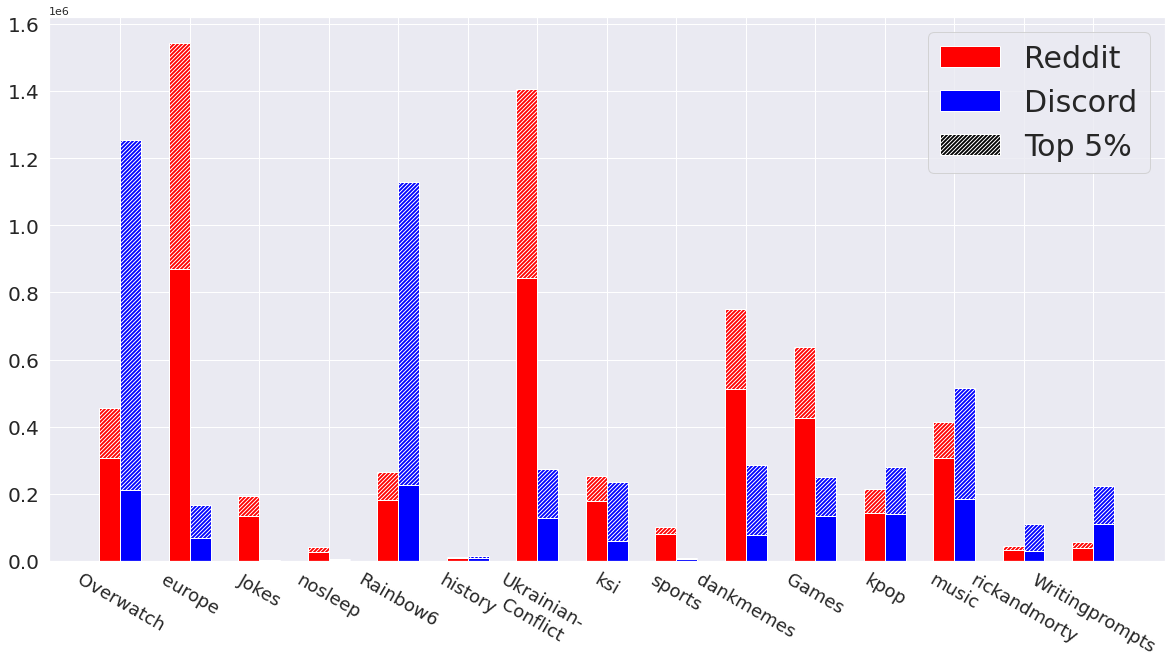

time: 3.3 s (started: 2023-01-13 14:01:02 +00:00)


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

hatch_level = '//////'
width = 0.3
custom_lines = [Patch(facecolor='red'),
                Patch(facecolor='blue'),
                Patch(facecolor='black', hatch=hatch_level)]
%matplotlib inline
# fig, ax = plt.subplots()
fig = plt.figure(figsize=(20, 10))

reddit_bar_list = [plt.bar(list(data_top_share['Community Name']), data_top_share['Reddit Total']*(1-data_top_share['Reddit Top Share']), align='edge', width= -width, label='Other',color='red'),
               plt.bar(list(data_top_share['Community Name']), data_top_share['Reddit Total']*data_top_share['Reddit Top Share'],bottom=data_top_share['Reddit Total']*(1-data_top_share['Reddit Top Share']), align='edge', width= -width,label='Top',color='red',hatch=hatch_level)]

discord_bar_list = [plt.bar(list(data_top_share['Community Name']), data_top_share['Discord Total']*(1-data_top_share['Discord Top Share']), align='edge',width= width,label='Other',color='blue'),
               plt.bar(list(data_top_share['Community Name']), data_top_share['Discord Total']*data_top_share['Discord Top Share'],bottom=data_top_share['Discord Total']*(1-data_top_share['Discord Top Share']), align='edge',width= width, label='Top',color='blue',hatch=hatch_level)]

# plt.ylim([0,0.2])
plt.xticks(fontsize=18, rotation=-30)
plt.yticks(fontsize=20, rotation=0)

plt.legend(custom_lines,['Reddit','Discord','Top 5%'],prop={'size': 30})
plt.savefig(my_dir+f"Charts/Platform_Content_Share_Users", bbox_inches = 'tight',format="jpeg", dpi=400, pad_inches = 0)

# Top Words

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import imageio
import nltk
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def plot_wordclouds(community_name_x):

  data_reddit=pd.read_csv(f'{my_dir}Datasets/reddit/{community_name_x}_subreddit_hate.csv', lineterminator='\n')
  data_discord=pd.read_csv(f'{my_dir}Datasets/discord/{community_name_x}_discord_hate.csv', lineterminator='\n')

  data_reddit=clean_df(data_reddit,text_col='comment_text',author_col='author')
  data_discord=clean_df(data_discord,text_col='content',author_col='author_username')

  
  fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)
  fig.suptitle(f'{community_name_x}',fontsize=20)

  reddit_wordcloud = WordCloud(background_color="white",random_state=1,stopwords=stop_words)
  discord_wordcloud = WordCloud(background_color="white",random_state=1,stopwords=stop_words)
  # reddit_counter = Counter(data_reddit['comment_text'].str.split().tolist()).most_common(2000)
  # discord_counter = Counter(data_discord['content'].str.split().tolist()).most_common(2000)
  reddit_counter = " ".join(data_reddit['comment_text'].sample(50000,replace=True))
  discord_counter = " ".join(data_discord['content'].sample(50000,replace=True))
  my_reddit_wordcloud = reddit_wordcloud.generate(reddit_counter)
  my_discord_wordcloud = discord_wordcloud.generate(discord_counter)


  axes[0].set_title('Reddit',fontsize=20)
  axes[0].imshow(my_reddit_wordcloud)
  axes[0].axis("off")

  axes[1].set_title('Discord',fontsize=20)
  axes[1].imshow(my_discord_wordcloud)
  axes[1].axis("off")
  plt.savefig(f"/content/drive/MyDrive/Discord-Reddit/Charts/WordClouds/word-counts/{community_name_x}-wordcount.png", format="png", dpi=300)



time: 12.6 ms (started: 2023-01-14 22:00:19 +00:00)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
community_names = ['Overwatch','europe','Jokes','nosleep','Rainbow6','history','Ukrainian','ksi','sports',
 'dankmemes','Games','kpop','music','rickandmorty','Writingprompts']

for community_name in community_names:
  plot_wordclouds(community_name_x=community_name)

Output hidden; open in https://colab.research.google.com to view.